<a href="https://colab.research.google.com/github/Dheerajpanwar123/Bank-loan-analysis-/blob/main/instareels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/instagram_reels_data.csv')



In [ ]:
df.head(6)

,Unnamed: 0,description,hashtags,url,account_id,likes,comments,topic
0,0.0,Day 68,#reels #fyp #barcelona #realmadrid,https://www.instagram.com/reels/C6C3zbfCrj1/,dancing_chicken.daily,37.2K,120,Sports
1,1.0,NaN,vana.cumm · Original audio,https://www.instagram.com/reels/C6BtBA_x_E-/,vana.cumm,96.7K,411,NaN
2,2.0,Tag someone 🤡❤️..........,#reelsindia #reelsvideos #instareels #instagra...,https://www.instagram.com/reels/C5D0YihJ_9k/,quoteswriter___,428K,12.8K,Relationships
3,3.0,Yen anthira 🤣🤣,#reels #comedy #kannadareels #yashwanthshetty ...,https://www.instagram.com/reels/C27EgB2LJKf/,yashwanth_shettyy,260K,"1,137",Comedy
4,4.0,Do you remember this guy??? go,#pokemon #pokemongo #nostalgia #retrogaming,https://www.instagram.com/reels/C2qqhuJxqdM/,doc.nostalgia,2.1M,"1,939",Gaming
5,5.0,No caption,NaN,https://www.instagram.com/reels/C5gxPCGy2Gg/,mtbfeeling__,13.5K,43,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1793 non-null   float64
 1   description  996 non-null    object 
 2   hashtags     1698 non-null   object 
 3   url          1014 non-null   object 
 4   account_id   1013 non-null   object 
 5   likes        1013 non-null   object 
 6   comments     1003 non-null   object 
 7   topic        1679 non-null   object 
dtypes: float64(1), object(7)
memory usage: 119.7+ KB


In [ ]:
df.isnull().sum()

,0
Unnamed: 0,120
description,917
hashtags,215
url,899
account_id,900
likes,900
comments,910
topic,234


In [ ]:
df = df.drop(columns=['Unnamed: 0', 'url', 'account_id'])


In [ ]:
df.head()

,description,hashtags,likes,comments,topic
0,Day 68,#reels #fyp #barcelona #realmadrid,37.2K,120,Sports
1,NaN,vana.cumm · Original audio,96.7K,411,NaN
2,Tag someone 🤡❤️..........,#reelsindia #reelsvideos #instareels #instagra...,428K,12.8K,Relationships
3,Yen anthira 🤣🤣,#reels #comedy #kannadareels #yashwanthshetty ...,260K,"1,137",Comedy
4,Do you remember this guy??? go,#pokemon #pokemongo #nostalgia #retrogaming,2.1M,"1,939",Gaming


In [ ]:
print(df.isnull().sum())


description    917
hashtags       215
likes          900
comments       910
topic          234
dtype: int64


In [ ]:
import numpy as np

# Updated conversion function
def convert_to_numeric(value):
    try:
        if isinstance(value, str):  # If the value is a string
            value = value.strip().upper().replace(',', '')  # Clean the string
            if 'K' in value:  # Convert 'K' to thousands
                return float(value.replace('K', '')) * 1000
            elif 'M' in value:  # Convert 'M' to millions
                return float(value.replace('M', '')) * 1000000
            else:  # Convert to float if no suffix
                return float(value)
        return value  # If already numeric or NaN, return as is
    except ValueError:  # If conversion fails
        return np.nan  # Assign NaN to problematic values

# Apply the function to the likes column
df['likes'] = df['likes'].apply(convert_to_numeric)


In [ ]:
print(df.isnull().sum())

description    917
hashtags         0
likes            0
comments       910
topic          234
dtype: int64


In [ ]:
# Fill missing values with median
df['likes'] = df['likes'].fillna(df['likes'].median())


In [ ]:
# Function to convert comments to numeric
def convert_comments_to_numeric(value):
    try:
        if isinstance(value, str):  # If the value is a string
            value = value.strip().upper().replace(',', '')  # Clean the string
            if 'K' in value:  # Convert 'K' to thousands
                return float(value.replace('K', '')) * 1000
            elif 'M' in value:  # Convert 'M' to millions
                return float(value.replace('M', '')) * 1000000
            else:  # Convert to float if no suffix
                return float(value)
        return value  # If already numeric or NaN, return as is
    except ValueError:  # If conversion fails
        return np.nan  # Assign NaN to problematic values

# Apply the function to the comments column
df['comments'] = df['comments'].apply(convert_comments_to_numeric)


In [ ]:
# Fill missing values in comments with the median
df['comments'] = df['comments'].fillna(df['comments'].median())


In [ ]:
df.isnull().sum()

,0
description,0
hashtags,0
likes,0
comments,0
topic,234


In [ ]:
# Fill missing values in the topic column with 'Unknown'
df['topic'] = df['topic'].fillna("Unknown")


In [ ]:
df.isnull().sum()

,0
description,0
hashtags,0
likes,0
comments,0
topic,0


In [ ]:
print(df.describe())

              likes       comments
count  1.913000e+03    1913.000000
mean   3.197861e+05    1826.849974
std    7.775564e+05    6345.790513
min    1.800000e+01       1.000000
25%    1.260000e+05     630.000000
50%    1.265000e+05     683.000000
75%    1.270000e+05     773.000000
max    1.100000e+07  150000.000000


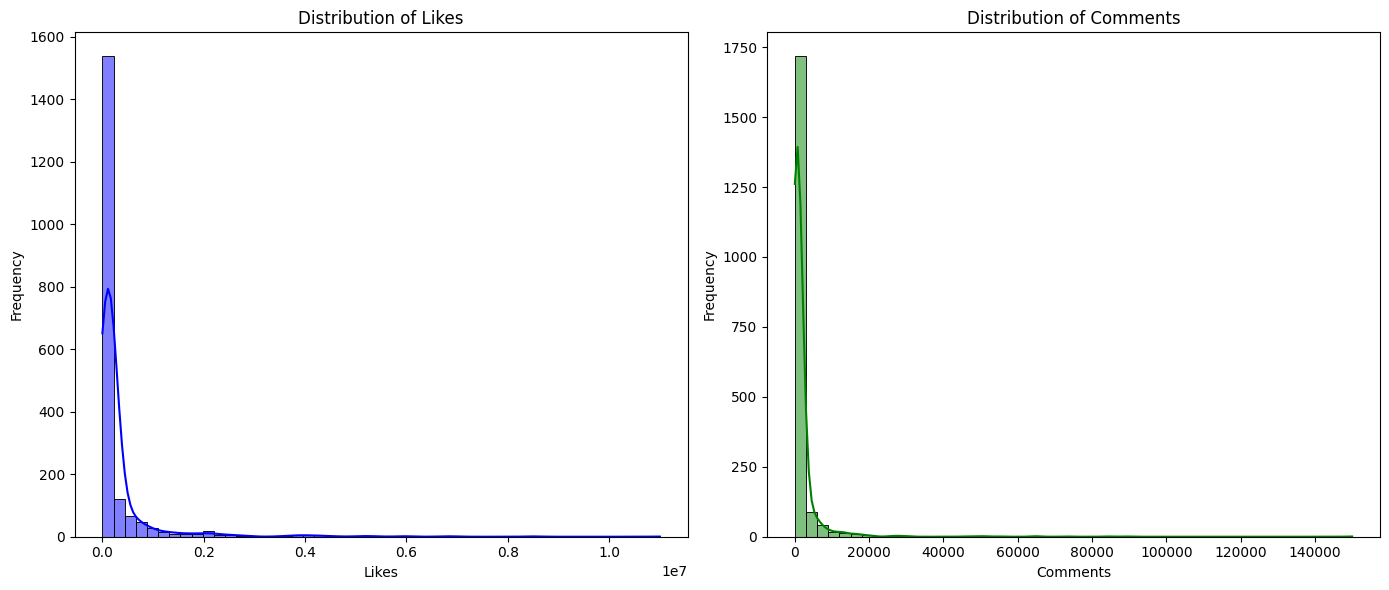

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(14, 6))

# Plot for Likes
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.histplot(df['likes'], kde=True, color='blue', bins=50)
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')

# Plot for Comments
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.histplot(df['comments'], kde=True, color='green', bins=50)
plt.title('Distribution of Comments')
plt.xlabel('Comments')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


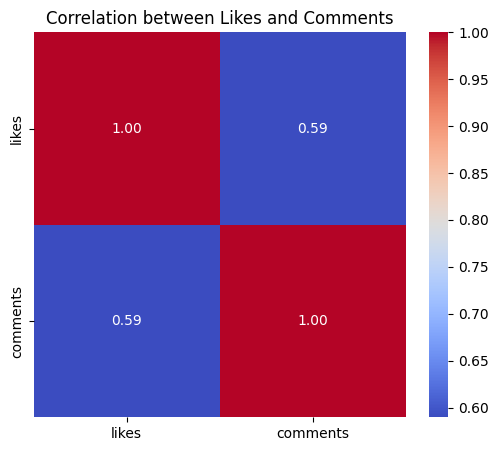

In [ ]:
# Compute the correlation matrix
correlation_matrix = df[['likes', 'comments']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Likes and Comments')
plt.show()


In [ ]:
df.head()

,description,hashtags,likes,comments,topic
0,Day 68,#reels #fyp #barcelona #realmadrid,37200.0,120.0,Sports
1,No description,vana.cumm · Original audio,96700.0,411.0,Unknown
2,Tag someone 🤡❤️..........,#reelsindia #reelsvideos #instareels #instagra...,428000.0,12800.0,Relationships
3,Yen anthira 🤣🤣,#reels #comedy #kannadareels #yashwanthshetty ...,260000.0,1137.0,Comedy
4,Do you remember this guy??? go,#pokemon #pokemongo #nostalgia #retrogaming,2100000.0,1939.0,Gaming


some questions in case study like :
1: check the topics where likes are maximum

In [ ]:
# Group the data by topic and sum the likes for each topic
likes_by_topic = df.groupby('topic')['likes'].sum()

# Sort the topics based on likes in descending order to find the topics with maximum likes
sorted_likes_by_topic = likes_by_topic.sort_values(ascending=False)

# Display the sorted results
print("Topics with the maximum likes:")
print(sorted_likes_by_topic)


Topics with the maximum likes:
topic
Unknown          146399938.0
Animals           52504432.0
Comedy            42663547.0
Trends            36962263.0
Education         35147792.0
Fitness           32707468.0
Sports            22702248.0
Healthcare        21010954.0
Relationships     20008988.0
Travel            18392089.0
Technology        18156897.0
Crafts            17065400.0
Motivation        16080445.0
Society           14964176.0
Food              13889599.0
Fashion           12804218.0
Music             12702549.0
Cinema            12299233.0
Spirituality      10915597.0
Photography       10760364.0
Knowledge          8083085.0
Wildlife           7771500.0
Architecture       7583000.0
Dance              7505100.0
Gaming             6039000.0
Business           3971000.0
Festivals          2660000.0
Name: likes, dtype: float64


In [ ]:
# Get the topic with the maximum likes
max_likes_topic = sorted_likes_by_topic.head(1)

# Display the result
print(f"Topic with the maximum likes: {max_likes_topic}")


Topic with the maximum likes: topic
Unknown    146399938.0
Name: likes, dtype: float64


In [ ]:
print(df['topic'].unique())

['Sports' 'Unknown' 'Relationships' 'Comedy' 'Gaming' 'Food' 'Crafts'
 'Technology' 'Fitness' 'Wildlife' 'Travel' 'Architecture' 'Motivation'
 'Knowledge' 'Spirituality' 'Education' 'Dance' 'Animals' 'Society'
 'Trends' 'Cinema' 'Festivals' 'Music' 'Business' 'Fashion' 'Healthcare'
 'Photography']


In [ ]:
# Remove rows where the topic is 'Unknown'
df_cleaned = df[df['topic'] != 'Unknown']

# Now group by topic and sum likes
likes_by_topic = df_cleaned.groupby('topic')['likes'].sum()

# Sort and get the topic with maximum likes
max_likes_topic = likes_by_topic.sort_values(ascending=False).head(1)

# Display the result
print(f"Topic with the maximum likes: {max_likes_topic}")


Topic with the maximum likes: topic
Animals    52504432.0
Name: likes, dtype: float64


<ipython-input-34-c3d54742a553>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_likes_by_topic.index, y=sorted_likes_by_topic.values, palette='viridis')


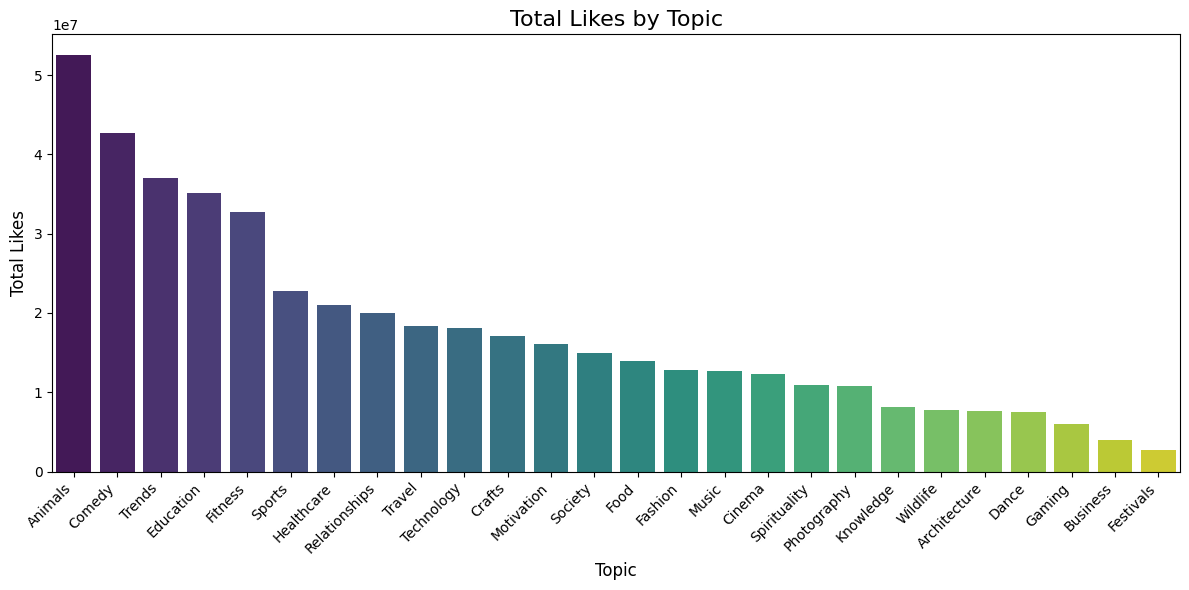

In [ ]:
# Group the data by topic and sum the likes for each topic
likes_by_topic = df_cleaned.groupby('topic')['likes'].sum()

# Sort the values in descending order for better visualization
sorted_likes_by_topic = likes_by_topic.sort_values(ascending=False)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_likes_by_topic.index, y=sorted_likes_by_topic.values, palette='viridis')

# Add titles and labels
plt.title('Total Likes by Topic', fontsize=16)
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Total Likes', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for readability
plt.tight_layout()

# Show the plot
plt.show()
